In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

#### 데이터 불러오기

In [2]:
customers_df = pd.read_csv("C:\팀플/BankChurners.csv")
customers_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


#### 결측치 확인

* 모든 컬럼 value 개수 10127개, `non-null`이므로 육안상으로 결측치는 없음

In [3]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [4]:
customers_df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

#### 하지만 Unknown 값을 갖는 실질적인 결측치 행들이 존재 -> 향후 분류해서 분석 혹은 미공개 희망 데이터 등으로 의미파악 후 분석

In [5]:
customers_df.loc[(customers_df['Education_Level'] == 'Unknown') | 
                (customers_df['Marital_Status'] == 'Unknown') |
                (customers_df['Income_Category'] == 'Unknown')]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.999880
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.999910
10,708790833,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,...,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217,0.000191,0.999810
11,710821833,Existing Customer,65,M,1,Unknown,Married,$40K - $60K,Blue,54,...,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174,0.000198,0.999800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10101,718372458,Existing Customer,42,M,2,Graduate,Unknown,$40K - $60K,Blue,30,...,3735.0,1723,2012.0,0.595,14501,92,0.840,0.461,0.000565,0.999440
10118,713755458,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,...,9959.0,952,9007.0,0.825,10310,63,1.100,0.096,0.998130,0.001874
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,...,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172,0.996910,0.003088
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729


#### 미사용 컬럼 제거

In [6]:
total_df = customers_df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis='columns')
total_df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## 이상치 확인을 위한 변수 탐색

### 명목형

#### 명목형 변수 확인

In [7]:
category_df = [col for col in total_df.columns if total_df[col].dtypes == 'object']
category_df

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

#### 명목형 변수의 value 분포 탐색

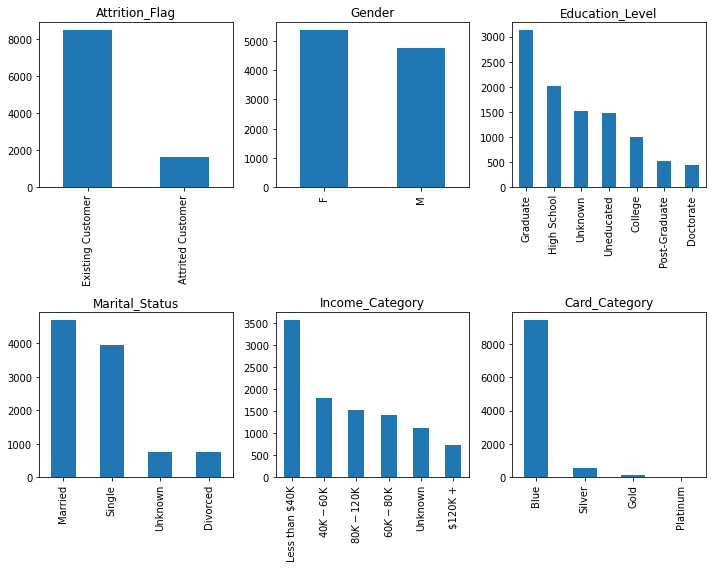

In [8]:
plt.figure(figsize = (10,8)) 
i = 1

for col in category_df:
    ax = plt.subplot(2, 3, i) # subplot 이용하여 그래프 배치, 2행 3열에서 i번째 그래프
    total_df[col].value_counts().plot(kind='bar')
    plt.title(col)
    i += 1
    
plt.tight_layout()
    
plt.show()

#### 명목형 변수 중 Binary value를 갖는 변수 EDA: `성별`과 `고객 상태` 분포 확인

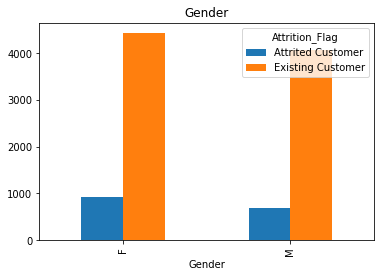

In [9]:
gender_df = total_df.groupby(['Gender', 'Attrition_Flag'])['Attrition_Flag'].count().unstack('Attrition_Flag')
gender_df.plot(kind='bar')
plt.title('Gender')
plt.show()

### 수치형

#### 수치형 변수 확인

In [10]:
numeric_ar = list(set(total_df) - set(category_df))
numeric_ar = np.sort(numeric_ar)
numeric_ar

array(['Avg_Open_To_Buy', 'Avg_Utilization_Ratio',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Customer_Age',
       'Dependent_count', 'Months_Inactive_12_mon', 'Months_on_book',
       'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1',
       'Total_Relationship_Count', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Total_Trans_Ct'], dtype='<U24')

#### 수치형 변수의 value 분포 탐색

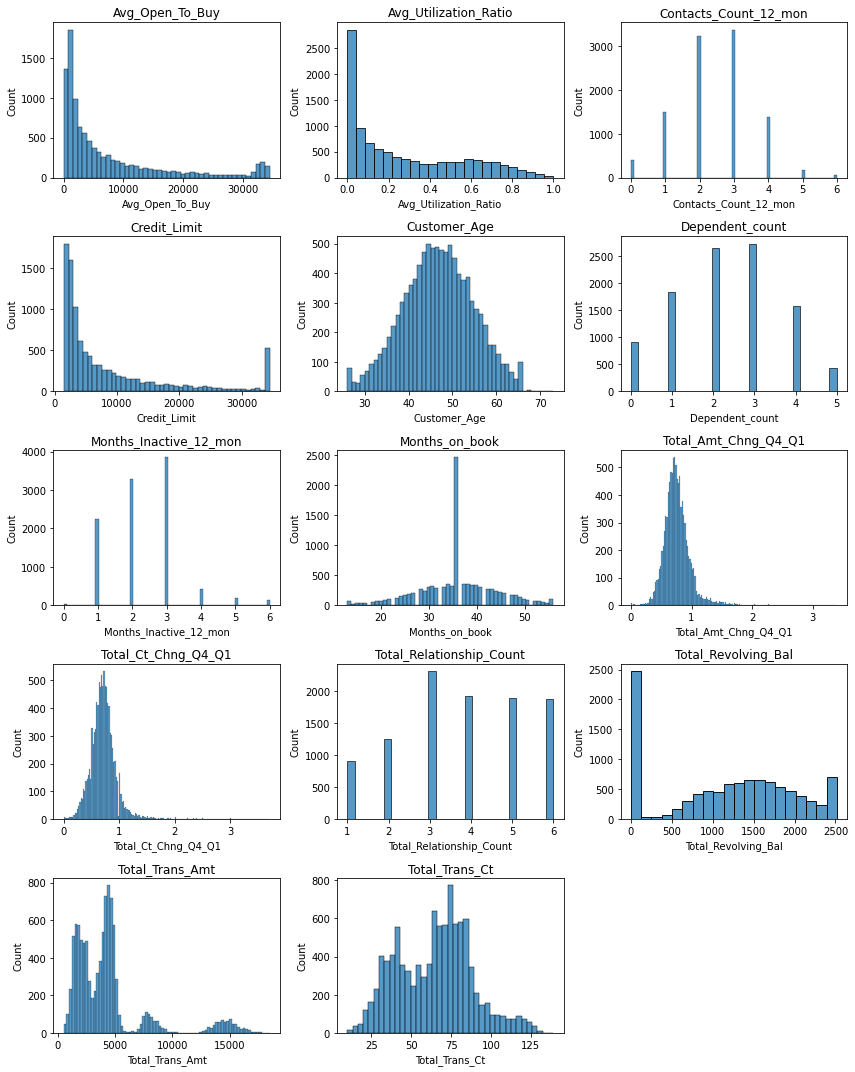

In [11]:
plt.figure(figsize = (12,15)) 
i = 1

for col in numeric_ar:
    ax = plt.subplot(5, 3, i) # subplot 이용하여 그래프 배치, 5행 3열에서 i번째 그래프
    sns.histplot(total_df.loc[total_df[col].notnull(), col])
    plt.title(col)
    i += 1
    
plt.tight_layout()
    
plt.show()


#### 수치형 변수의 value 분포 탐색: histogram과 비교하기 위해 boxplot 생성

c:\users\김예지\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\김예지\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\김예지\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

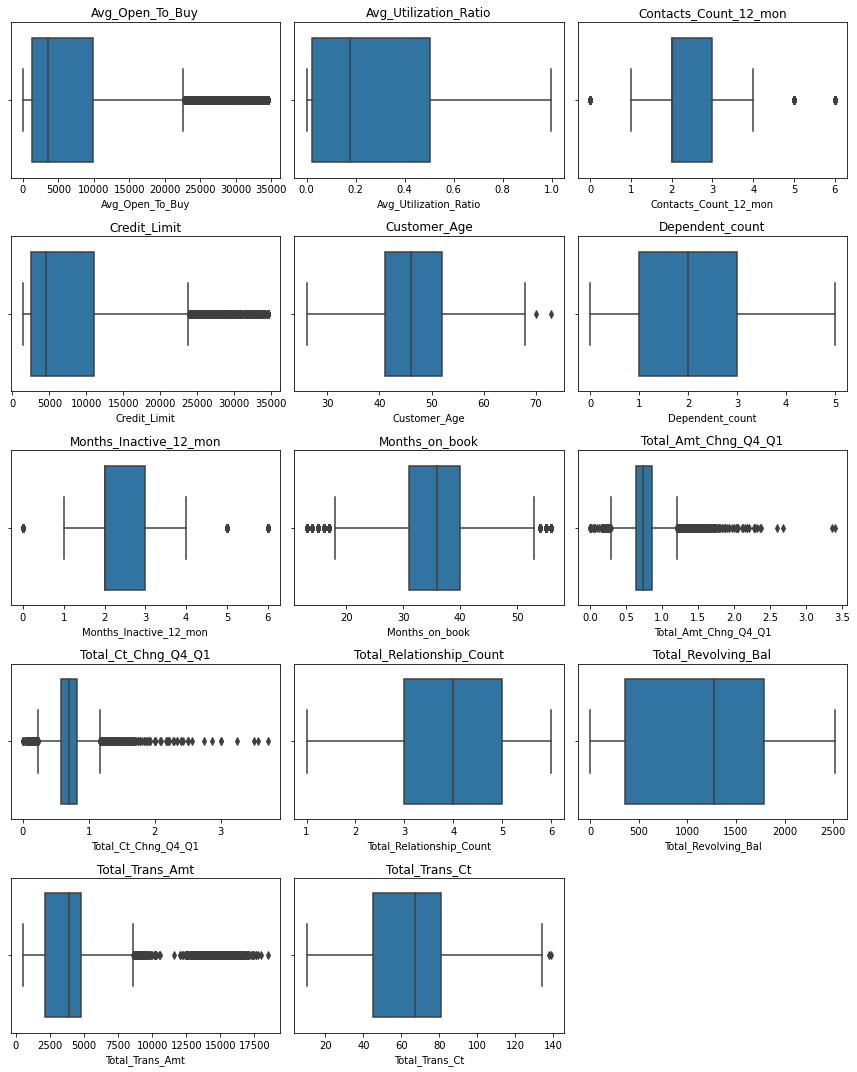

In [12]:
plt.figure(figsize = (12,15)) 
j = 1

for col in numeric_ar:
    ax = plt.subplot(5, 3, j) # subplot 이용하여 그래프 배치, 5행 3열에서 i번째 그래프
    sns.boxplot(total_df.loc[total_df[col].notnull(), col])
    plt.title(col)
    j += 1
    
plt.tight_layout()
    
plt.show()

#### 비슷한 range끼리 subplot 묶기
- Boxplot 보기 불편함

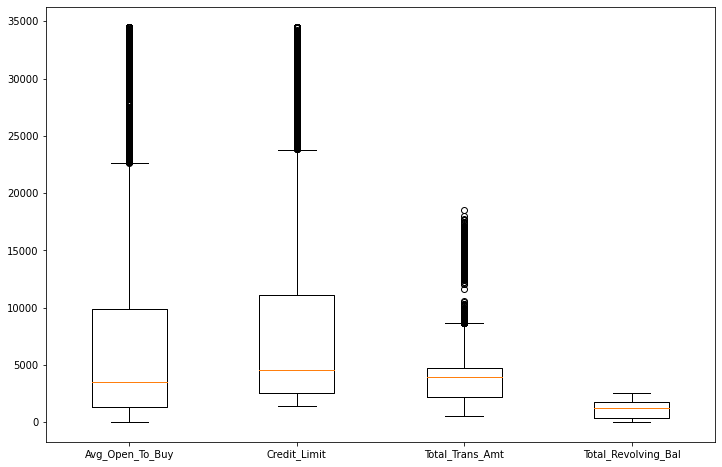

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
ax.boxplot([total_df['Avg_Open_To_Buy'],
            total_df['Credit_Limit'],
            total_df['Total_Trans_Amt'],
            total_df['Total_Revolving_Bal'], 
           ])
plt.xticks([1,2,3,4], ['Avg_Open_To_Buy', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Revolving_Bal'])
plt.show()

# Avg_Open_To_Buy : (신용 한도 - 현재 계좌 잔액)의 평균값
#     즉, 돈을 많이 안 쓸수록 큰 값이 나옴 -> 이탈고객일 확률 높음

# Credit_Limit : 한도가 높을수록 놓쳐서 안 되는 고객

# Total_Trans_Amt : 1년동안 거래 금액. 이상치로 볼 수 없음

# Total_Revolving_Bal : 다음달로 이월되는 연체금


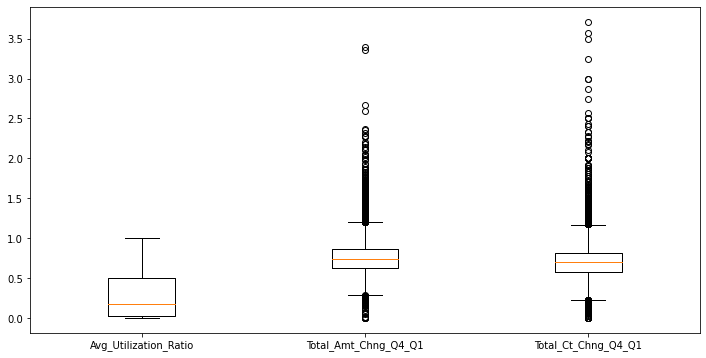

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot([total_df['Avg_Utilization_Ratio'],
            total_df['Total_Amt_Chng_Q4_Q1'],
            total_df['Total_Ct_Chng_Q4_Q1']
           ])
plt.xticks([1,2,3], ['Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1'])
plt.show()

# Avg_Utilization_Ratio : 비율이라 이상치 없음

# Total_Amt_Chng_Q4_Q1 : 1분기 대비 4분기에 쓴 변화량 총액
#       0에 가까울수록 이탈한 사람일 것이고, 높을수록 4분기에 돈을 많이 쓴 고객

# Total_Ct_Chng_Q4_Q1 : 1분기 대비 4분기에 변화된 횟수
#       0에 가까울수록 이탈한 사람일 것이고, 높을수록 4분기에 돈을 많이 쓴 고객

In [15]:
# h0 : Total_Ct_Chng_Q4_Q1 가 적을수록 이탈 고객일 것이다

# Total_Ct_Chng_Q4_Q1 횟수 : 0.2 이하인 사람들
total_df[total_df['Total_Ct_Chng_Q4_Q1'] <= 0.2][['Total_Ct_Chng_Q4_Q1', 'Attrition_Flag' ]].value_counts()

Total_Ct_Chng_Q4_Q1  Attrition_Flag   
0.000                Attrited Customer    7
0.200                Attrited Customer    5
0.077                Attrited Customer    3
0.133                Attrited Customer    3
0.091                Attrited Customer    3
0.107                Attrited Customer    3
0.194                Existing Customer    2
0.059                Attrited Customer    2
0.161                Attrited Customer    2
0.167                Attrited Customer    2
0.111                Attrited Customer    2
0.176                Attrited Customer    2
0.143                Attrited Customer    2
0.182                Attrited Customer    2
0.192                Attrited Customer    1
0.171                Attrited Customer    1
0.172                Existing Customer    1
0.174                Existing Customer    1
0.182                Existing Customer    1
0.179                Attrited Customer    1
0.190                Attrited Customer    1
0.185                Attrited Custome

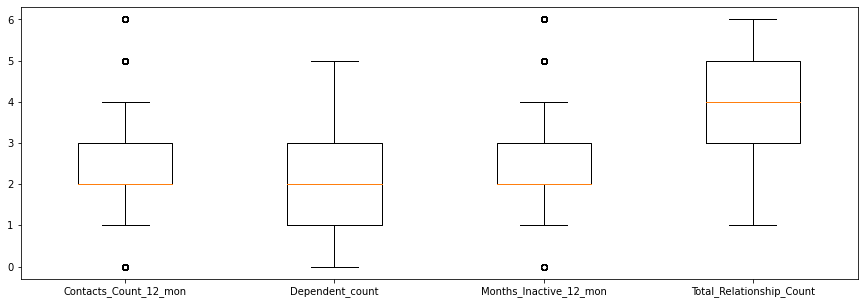

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot([total_df['Contacts_Count_12_mon'],
            total_df['Dependent_count'],
            total_df['Months_Inactive_12_mon'],
            total_df['Total_Relationship_Count']
           ])
plt.xticks([1,2,3,4], ['Contacts_Count_12_mon', 'Dependent_count', 
                       'Months_Inactive_12_mon', 'Total_Relationship_Count'])
plt.show()

# Contacts_Count_12_mon : 신용카드 회사에 1년동안 연락한 횟수

# Dependent_count : 부양가족수

# Months_Inactive_12_mon : 1년간 카드를 사용하지 않은 개월 수

# Total_Relationship_Count : 고객이 보유한 제품의 개수

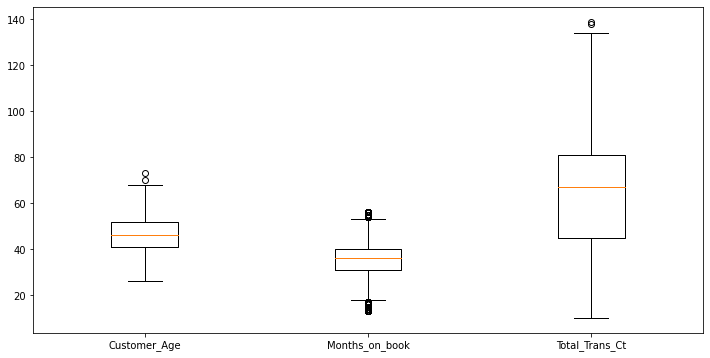

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot([total_df['Customer_Age'],
            total_df['Months_on_book'],
            total_df['Total_Trans_Ct'],
           ])
plt.xticks([1,2,3], ['Customer_Age', 'Months_on_book', 'Total_Trans_Ct'])
plt.show()

# Customer_Age : 고객 나이

# Months_on_book : 한 달간 은행 예약 횟수?

# Total_Trans_Ct : 1년간 총 거래 횟수


##### 가설 검증

In [18]:
# 가설1
# h0: Contacts_Count_12_mon 횟수가 많을수록 이탈 고객일 것이다

# Contacts_Count_12_mon 횟수 : 5, 6 인 사람들
total_df[total_df['Contacts_Count_12_mon'] > 4][['Contacts_Count_12_mon', 'Attrition_Flag' ]].value_counts()

# Contacts_Count_12_mon 횟수 : 0 인 사람들
# total_df[total_df['Contacts_Count_12_mon'] == 0][['Contacts_Count_12_mon', 'Attrition_Flag' ]].value_counts()

Contacts_Count_12_mon  Attrition_Flag   
5                      Existing Customer    117
                       Attrited Customer     59
6                      Attrited Customer     54
dtype: int64

In [19]:
# 가설2
# h0: Months_Inactive_12_mon 횟수가 많을수록 이탈 고객일 것이다? 
# 답변 : Noooooooooooooo !!

# Months_Inactive_12_mon 횟수 : 5, 6 인 사람들
total_df[total_df['Months_Inactive_12_mon'] > 4][['Months_Inactive_12_mon', 'Attrition_Flag' ]].value_counts()

Months_Inactive_12_mon  Attrition_Flag   
5                       Existing Customer    146
6                       Existing Customer    105
5                       Attrited Customer     32
6                       Attrited Customer     19
dtype: int64

In [20]:
# 가설3
# h0: Months_on_book이 작을수록/클수록 이탈 고객일 것이다? 

# Months_on_book 횟수 : 50 이상인 사람들
total_df[total_df['Months_on_book'] > 50][['Months_on_book', 'Attrition_Flag' ]].value_counts()

Months_on_book  Attrition_Flag   
56              Existing Customer    86
53              Existing Customer    71
51              Existing Customer    64
52              Existing Customer    50
54              Existing Customer    47
55              Existing Customer    38
56              Attrited Customer    17
51              Attrited Customer    16
52              Attrited Customer    12
53              Attrited Customer     7
54              Attrited Customer     6
55              Attrited Customer     4
dtype: int64

In [21]:
# 가설4 
# h0: Total_Trans_Ct 작을수록 이탈 고객일 것이다? 

# Total_Trans_Ct 횟수 : 20 이하인 사람들
total_df[total_df['Total_Trans_Ct'] < 20][['Total_Trans_Ct', 'Attrition_Flag' ]].value_counts()

Total_Trans_Ct  Attrition_Flag   
18              Attrited Customer    15
15              Attrited Customer    12
17              Attrited Customer    10
16              Attrited Customer     8
18              Existing Customer     8
14              Attrited Customer     8
19              Attrited Customer     7
16              Existing Customer     5
10              Attrited Customer     4
15              Existing Customer     4
12              Attrited Customer     4
19              Existing Customer     4
17              Existing Customer     3
13              Attrited Customer     3
                Existing Customer     2
11              Attrited Customer     1
14              Existing Customer     1
11              Existing Customer     1
dtype: int64

### 수치형 변수의 탐색: 이변수에 대한 Attrition Flag의 분포

numeric_df를 세 개의 그룹으로 나누어 탐색

In [22]:
numeric_df1 = total_df[['Avg_Open_To_Buy', 'Avg_Utilization_Ratio', 'Contacts_Count_12_mon', 
                          'Credit_Limit', 'Customer_Age']]
numeric_df2 = total_df[['Dependent_count', 'Months_Inactive_12_mon', 'Months_on_book',
                          'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']]
numeric_df3 = total_df[[ 'Total_Relationship_Count', 'Total_Revolving_Bal',
                          'Total_Trans_Amt', 'Total_Trans_Ct']]

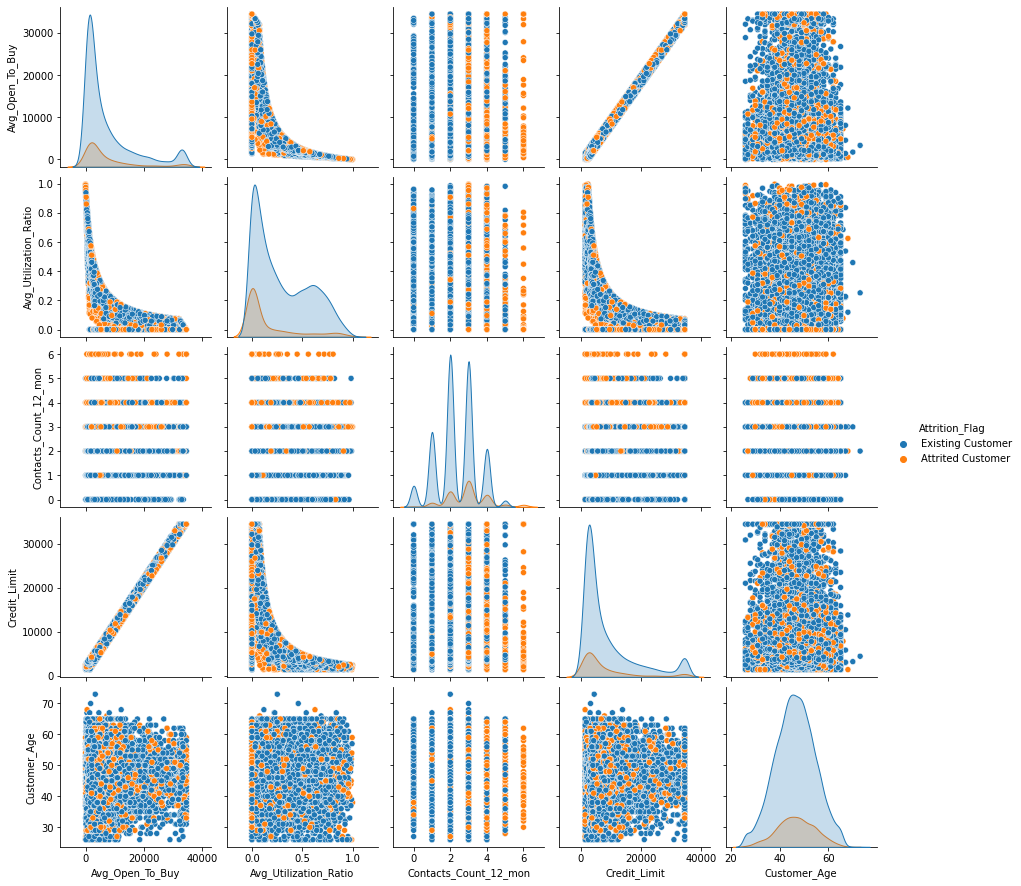

In [23]:
# numeric_df1 그래프
sns.pairplot(total_df[list(numeric_df1) + ['Attrition_Flag']], hue='Attrition_Flag', x_vars=numeric_df1, y_vars=numeric_df1)
plt.show()

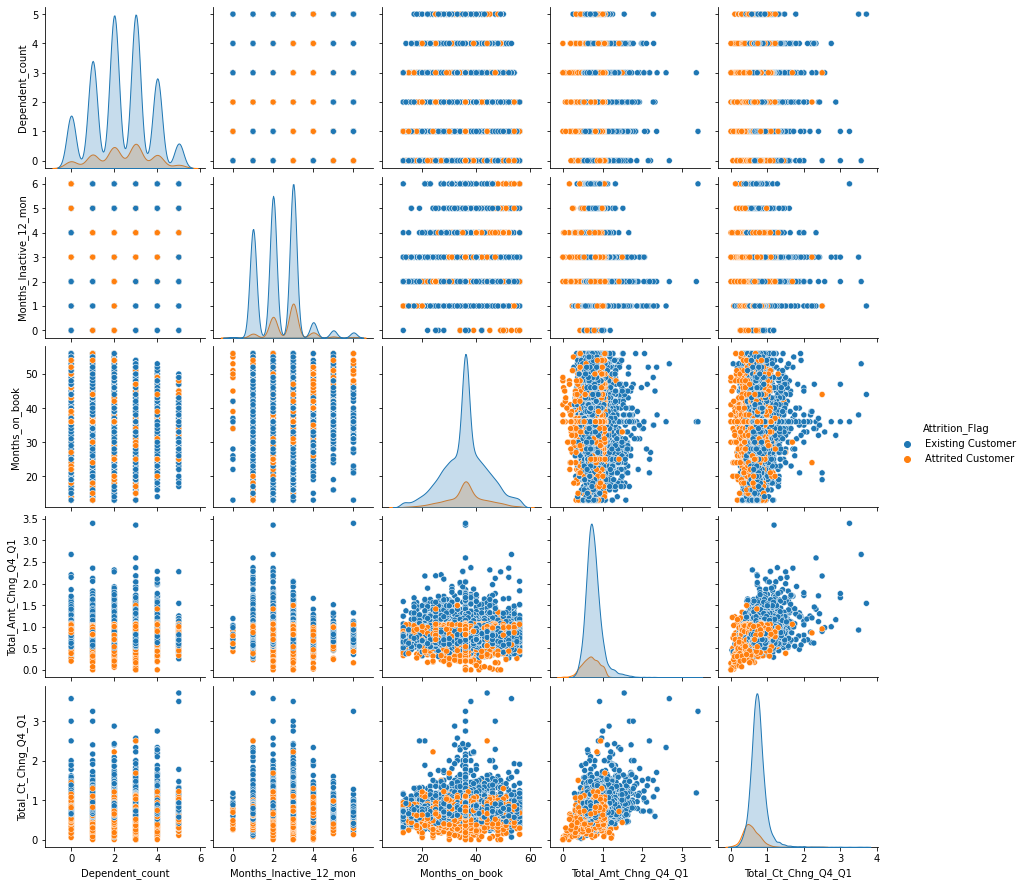

In [24]:
# numeric_df2 그래프
sns.pairplot(total_df[list(numeric_df2) + ['Attrition_Flag']], hue='Attrition_Flag', x_vars=numeric_df2, y_vars=numeric_df2)
plt.show()

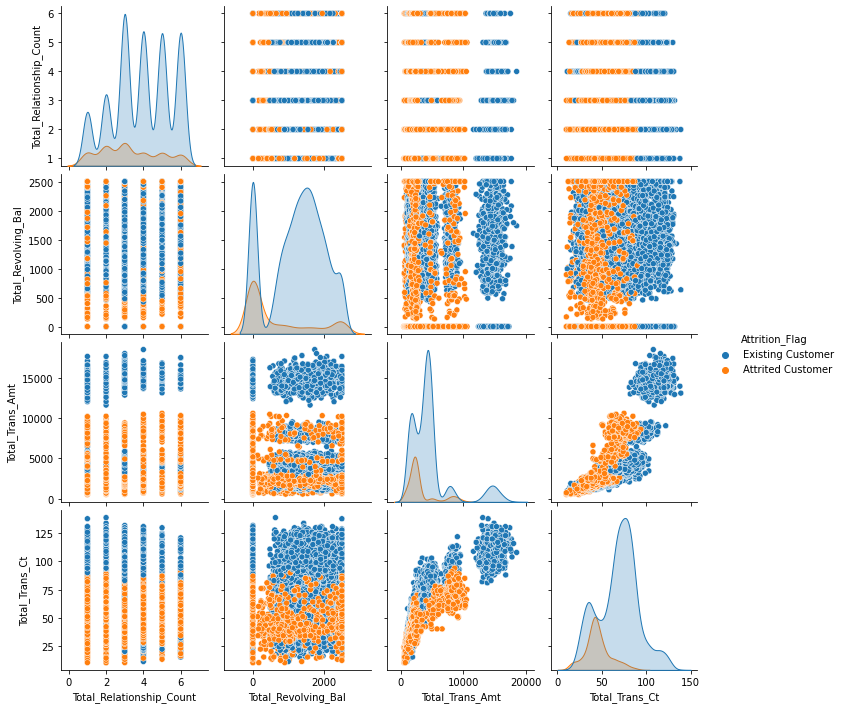

In [25]:
# numeric_df3 그래프
sns.pairplot(total_df[list(numeric_df3) + ['Attrition_Flag']], hue='Attrition_Flag', x_vars=numeric_df3, y_vars=numeric_df3)
plt.show()

## preprocessing

#### 각 column type 확인

In [26]:
total_df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

### Y변수의 처리

#### 범주형 변수 Attrition_Flag 클래스 변환
- Existing Customer: `class 0`
- Attrited Customer: `class 1`

In [27]:
total_df['Attrition_Flag'] = [0 if t else 1 for t in list(total_df['Attrition_Flag'] == 'Existing Customer')]

### X변수의 처리

#### 수치형 변수: Customer_Age, Dependent_count 등 총 14개 column은 모델에 투입할 변수 선정 후 grouping 예정
#### 범주형 변수: Gender, Education_Level 등 총 5개는 특성에 따라 서열척도 혹은 더미변수로 변환

- 서열척도 변환: Education_Level, Income_Category, Card_Category

#### value 확인

In [28]:
print(total_df['Education_Level'].value_counts())
print()
print(total_df['Income_Category'].value_counts())
print()
print(total_df['Card_Category'].value_counts())

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


> Education_Level, Income_Category 내의 `Unknown` value는 해석에 사용될 수도 사용되지 않을 수도 있으므로 Unknown value 자체는 `0`으로 서열화하고, 대신 Unknown 여부를 별도로 표시하는 `Education_info`, `Income_info column`을 만들도록 함

In [29]:
total_df['Education_Level'].replace({'Unknown' : 0, 'Uneducated' : 1, 'High School' : 2, 'College' : 3, 'Post-Graduate' : 4, 'Graduate' : 5, 'Doctorate' : 6}, inplace=True)

In [30]:
total_df['Education_Level'].value_counts()

5    3128
2    2013
0    1519
1    1487
3    1013
4     516
6     451
Name: Education_Level, dtype: int64

In [31]:
total_df['Education_info'] = [1 if t else 0 for t in list(total_df['Education_Level'] == 'Unknown')]
total_df['Education_info'].value_counts()

0    10127
Name: Education_info, dtype: int64

In [32]:
total_df['Income_Category'].replace({'Unknown' : 0, 'Less than $40K' : 1, '$40K - $60K' : 2, '$60K - $80K' : 3, '$80K - $120K' : 4, '$120K +' : 5}, inplace=True)

In [33]:
total_df['Income_Category'].value_counts()

1    3561
2    1790
4    1535
3    1402
0    1112
5     727
Name: Income_Category, dtype: int64

In [34]:
total_df['Income_info'] = [1 if t else 0 for t in list(total_df['Income_Category'] == 'Unknown')]
total_df['Income_info'].value_counts()

0    10127
Name: Income_info, dtype: int64

In [35]:
total_df['Card_Category'].replace({'Blue' : 1, 'Silver' : 2, 'Gold' : 3, 'Platinum' : 4}, inplace=True)

In [36]:
total_df['Card_Category'].value_counts()

1    9436
2     555
3     116
4      20
Name: Card_Category, dtype: int64

- 더미변수 변환: Gender, Marital_Status

#### value 확인

In [37]:
print(total_df['Gender'].value_counts())
print()
print(total_df['Marital_Status'].value_counts())

F    5358
M    4769
Name: Gender, dtype: int64

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64


In [38]:
total_df['Gender'] = [0 if t else 1 for t in list(total_df['Gender'] == 'M')]

> Marital_Status 내의 `Unknown` value는 해석에 사용될 수도 사용되지 않을 수도 있으므로 Unknown value를 안고 가야 함. 따라서 pd.get_dummies를 사용할 수는 없기 때문에(Married가 baseline이 되어 사라지는 게 마음에 들지 않음) 새로운 함수를 정의하여 더미변수화함

In [39]:
def get_dummydrop(df,columns,base_value=None):
    '''
    df : 데이터프레임
    columns : 가변수로 변환할 칼럼들
    base_value : {가변수로 변환할 칼럼명 : 제외시킬 범주}
    '''
    for c in columns:
        num_level = len(set(df[c])) ## 유니크한 원소의 개수
        uniq_element = sorted(list(set(df[c])))[1:] ## 정렬했을 때 첫 번째 범주를 제외
        
        if base_value: ## 제외시킬 범주가 있을 경우 해당 범주를 제외
            if c in base_value.keys():
                assert base_value[c] in list(set(df[c])), f'{base_value[c]} is not contained in {c}'
                uniq_element = sorted(list(set(df[c])-{base_value[c]}))
                    
        data = dict()
        for i in range(num_level-1):
            dummy_data = []
            val = uniq_element[i]
            for d in df[c]: ## 해당 범주인 경우만 1 나머지는 0
                if d == val:
                    dummy_data.append(1)
                else:
                    dummy_data.append(0)
            col_name = c+'_'+str(val) ## 가변수의 칼럼명 지정
            data[col_name] = dummy_data
        
        temp_df = pd.DataFrame(data)
        df = pd.concat([df,temp_df],axis=1) ## 가변수 칼럼을 원 데이터 뒤에 결합
 
    return df.drop(columns=columns) ## 원 범주 칼럼 제외    

In [40]:
dummy_df = get_dummydrop(total_df,['Marital_Status'],{'Marital_Status':'Unknown'})   # Marital_Status에서 Unknown 제외

In [41]:
dummy_df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_info,Income_info,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,0,45,0,3,2,3,1,39,5,1,...,1.335,1144,42,1.625,0.061,0,0,0,1,0
1,0,49,1,5,5,1,1,44,6,1,...,1.541,1291,33,3.714,0.105,0,0,0,0,1
2,0,51,0,3,5,4,1,36,4,1,...,2.594,1887,20,2.333,0.000,0,0,0,1,0
3,0,40,1,4,2,1,1,34,3,4,...,1.405,1171,20,2.333,0.760,0,0,0,0,0
4,0,40,0,3,1,3,1,21,5,1,...,2.175,816,28,2.500,0.000,0,0,0,1,0


In [42]:
dummy_df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_info', 'Income_info', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single'],
      dtype='object')

### Correlation 확인

In [43]:
dummy_df.corr()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_info,Income_info,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
Attrition_Flag,1.000000,0.018203,0.037272,0.018991,0.004271,-0.013577,0.002354,0.013687,-0.150005,0.152449,...,-0.131063,-0.168598,-0.371403,-0.290054,-0.178410,NaN,NaN,0.000850,-0.023735,0.019037
Customer_Age,0.018203,1.000000,0.017312,-0.122254,0.000376,0.023508,-0.018235,0.788912,-0.010931,0.054361,...,-0.062042,-0.046446,-0.067097,-0.012143,0.007114,NaN,NaN,-0.042614,0.047364,-0.011248
Gender,0.037272,0.017312,1.000000,-0.004563,0.006975,-0.786608,-0.080093,0.006728,-0.003157,0.011163,...,-0.026712,-0.024890,0.067454,0.005800,0.257851,NaN,NaN,0.004726,-0.011427,0.015756
Dependent_count,0.018991,-0.122254,-0.004563,1.000000,-0.000497,0.066278,0.030469,-0.103062,-0.039076,-0.010768,...,-0.035439,0.025046,0.049912,0.011087,-0.037135,NaN,NaN,0.006697,0.014385,-0.040707
Education_Level,0.004271,0.000376,0.006975,-0.000497,1.000000,-0.013679,0.014818,0.008485,0.000588,0.007120,...,-0.011501,-0.006689,-0.003746,-0.014505,-0.000526,NaN,NaN,0.003061,0.015002,-0.014070
Income_Category,-0.013577,0.023508,-0.786608,0.066278,-0.013679,1.000000,0.077326,0.022122,-0.003202,-0.016310,...,0.011352,0.019651,-0.054569,-0.012657,-0.246476,NaN,NaN,-0.008734,0.023808,-0.024715
Card_Category,0.002354,-0.018235,-0.080093,0.030469,0.014818,0.077326,1.000000,-0.012535,-0.094077,-0.014629,...,0.007385,0.196003,0.134275,-0.007261,-0.198711,NaN,NaN,-0.004028,-0.049254,0.040783
Months_on_book,0.013687,0.788912,0.006728,-0.103062,0.008485,0.022122,-0.012535,1.000000,-0.009203,0.074164,...,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,NaN,NaN,-0.027678,0.033194,-0.005065
Total_Relationship_Count,-0.150005,-0.010931,-0.003157,-0.039076,0.000588,-0.003202,-0.094077,-0.009203,1.000000,-0.003675,...,0.050119,-0.347229,-0.241891,0.040831,0.067663,NaN,NaN,0.009276,0.017001,-0.017329
Months_Inactive_12_mon,0.152449,0.054361,0.011163,-0.010768,0.007120,-0.016310,-0.014629,0.074164,-0.003675,1.000000,...,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503,NaN,NaN,0.001796,-0.007065,0.008973


In [44]:
corr_df = dummy_df.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_info,Income_info,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
Attrition_Flag,1.00,0.02,0.04,0.02,0.00,-0.01,0.00,0.01,-0.15,0.15,...,-0.13,-0.17,-0.37,-0.29,-0.18,NaN,NaN,0.00,-0.02,0.02
Customer_Age,0.02,1.00,0.02,-0.12,0.00,0.02,-0.02,0.79,-0.01,0.05,...,-0.06,-0.05,-0.07,-0.01,0.01,NaN,NaN,-0.04,0.05,-0.01
Gender,0.04,0.02,1.00,-0.00,0.01,-0.79,-0.08,0.01,-0.00,0.01,...,-0.03,-0.02,0.07,0.01,0.26,NaN,NaN,0.00,-0.01,0.02
Dependent_count,0.02,-0.12,-0.00,1.00,-0.00,0.07,0.03,-0.10,-0.04,-0.01,...,-0.04,0.03,0.05,0.01,-0.04,NaN,NaN,0.01,0.01,-0.04
Education_Level,0.00,0.00,0.01,-0.00,1.00,-0.01,0.01,0.01,0.00,0.01,...,-0.01,-0.01,-0.00,-0.01,-0.00,NaN,NaN,0.00,0.02,-0.01
Income_Category,-0.01,0.02,-0.79,0.07,-0.01,1.00,0.08,0.02,-0.00,-0.02,...,0.01,0.02,-0.05,-0.01,-0.25,NaN,NaN,-0.01,0.02,-0.02
Card_Category,0.00,-0.02,-0.08,0.03,0.01,0.08,1.00,-0.01,-0.09,-0.01,...,0.01,0.20,0.13,-0.01,-0.20,NaN,NaN,-0.00,-0.05,0.04
Months_on_book,0.01,0.79,0.01,-0.10,0.01,0.02,-0.01,1.00,-0.01,0.07,...,-0.05,-0.04,-0.05,-0.01,-0.01,NaN,NaN,-0.03,0.03,-0.01
Total_Relationship_Count,-0.15,-0.01,-0.00,-0.04,0.00,-0.00,-0.09,-0.01,1.00,-0.00,...,0.05,-0.35,-0.24,0.04,0.07,NaN,NaN,0.01,0.02,-0.02
Months_Inactive_12_mon,0.15,0.05,0.01,-0.01,0.01,-0.02,-0.01,0.07,-0.00,1.00,...,-0.03,-0.04,-0.04,-0.04,-0.01,NaN,NaN,0.00,-0.01,0.01


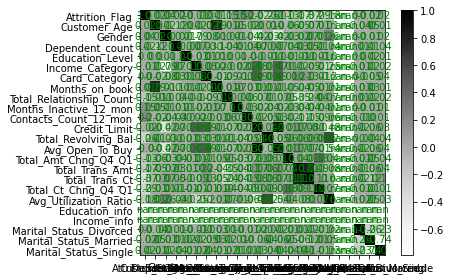

In [45]:
fig, ax = plt.subplots()
im = ax.imshow(corr_df, cmap='Greys')

# Color Bar
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(corr_df.columns)))
ax.set_yticks(np.arange(len(corr_df.index)))

ax.set_xticklabels(corr_df.columns)
ax.set_yticklabels(corr_df.columns)

for x in range(len(corr_df.columns)):
    for y in range(len(corr_df.index)):
        ax.text(y, x, corr_df.iloc[y, x], ha='center', va='center', color='g')

fig.tight_layout()   
plt.show()  

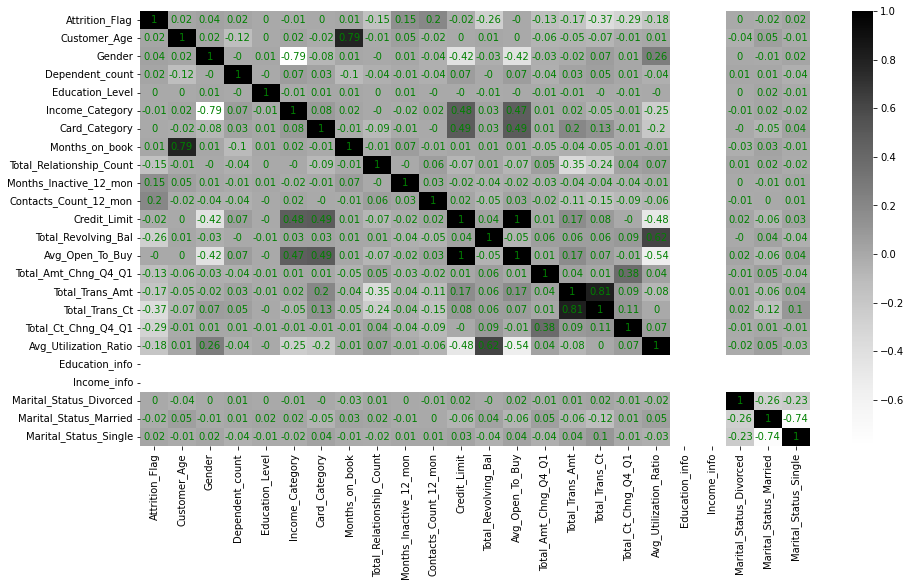

In [46]:
import seaborn as sns

plt.figure(figsize = (15,8))
ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()

In [47]:
from statsmodels.formula.api import ols

In [48]:
res = ols('Attrition_Flag ~ Education_Level ', data=total_df).fit()

In [49]:
res.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x00000296FBF75670>>

### logistic regression

In [50]:
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree, classificationSummary
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# 경우 나눠서 확인하기(1); 기존 데이터 사용

> 가. 변수 전체 사용
> * a. train : valid = 6:4
> * b. train : valid = 7:3
> * c. train : valid = 8:2

> 나. Corr 상위 변수 7개 사용
> * a. train : valid = 6:4
> * b. train : valid = 7:3
> * c. train : valid = 8:2

## 가-a

In [51]:
X = dummy_df.drop(columns=['Attrition_Flag'])
y = dummy_df['Attrition_Flag']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [52]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score


In [53]:
# 정확도 구하는 함수
def get_clf_eval(y, pred_y):
    confusion = confusion_matrix(y, pred_y)
    accuracy = accuracy_score(y, pred_y)
    recall = recall_score(y, pred_y)
    f1 = f1_score(y, pred_y)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Recall: {1:.4f}, F1-score: {2:.4f}'.format(accuracy, recall, f1))

In [54]:
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)


LogisticRegression(C=1e+42, solver='liblinear')

In [55]:

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))


intercept  0.05605911886916622
       Customer_Age    Gender  Dependent_count  Education_Level  \
coeff      0.033604  0.119155         0.237858         0.027078   

       Income_Category  Card_Category  Months_on_book  \
coeff        -0.006363       0.084442       -0.000346   

       Total_Relationship_Count  Months_Inactive_12_mon  \
coeff                 -0.263562                0.344121   

       Contacts_Count_12_mon  ...  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
coeff               0.411324  ...             -0.028214         0.000395   

       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
coeff       -0.097694            -0.126498               0.009509   

       Education_info  Income_info  Marital_Status_Divorced  \
coeff             0.0          0.0                 0.019954   

       Marital_Status_Married  Marital_Status_Single  
coeff               -0.074747               0.102118  

[1 rows x 23 columns]

AIC 2644.2831097886046


In [56]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8884)

       Prediction
Actual    0    1
     0 4952  146
     1  532  446
Confusion Matrix (Accuracy 0.8889)

       Prediction
Actual    0    1
     0 3304   98
     1  352  297


In [57]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score
# 정확도 구하는 함수
def get_clf_eval(y, pred_y):
    confusion = confusion_matrix(y, pred_y)
    accuracy = accuracy_score(y, pred_y)
    recall = recall_score(y, pred_y)
    f1 = f1_score(y, pred_y)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Recall: {1:.4f}, F1-score: {2:.4f}'.format(accuracy, recall, f1))

In [58]:
# get_clf_eval(train_y, pred_y)

NameError: name 'pred_y' is not defined

In [ ]:
# get_clf_eval(valid_y, pred_y)

## 가-b

In [59]:
X = dummy_df.drop(columns=['Attrition_Flag'])
y = dummy_df['Attrition_Flag']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  0.05605911886916622
       Customer_Age    Gender  Dependent_count  Education_Level  \
coeff      0.033604  0.119155         0.237858         0.027078   

       Income_Category  Card_Category  Months_on_book  \
coeff        -0.006363       0.084442       -0.000346   

       Total_Relationship_Count  Months_Inactive_12_mon  \
coeff                 -0.263562                0.344121   

       Contacts_Count_12_mon  ...  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
coeff               0.411324  ...             -0.028214         0.000395   

       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
coeff       -0.097694            -0.126498               0.009509   

       Education_info  Income_info  Marital_Status_Divorced  \
coeff             0.0          0.0                 0.019954   

       Marital_Status_Married  Marital_Status_Single  
coeff               -0.074747               0.102118  

[1 rows x 23 columns]

AIC 2017.870690061287


In [60]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8888)

       Prediction
Actual    0    1
     0 5781  168
     1  620  519
Confusion Matrix (Accuracy 0.8881)

       Prediction
Actual    0    1
     0 2475   76
     1  264  224


## 가-c

In [61]:
X = dummy_df.drop(columns=['Attrition_Flag'])
y = dummy_df['Attrition_Flag']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  0.05605911886916622
       Customer_Age    Gender  Dependent_count  Education_Level  \
coeff      0.033604  0.119155         0.237858         0.027078   

       Income_Category  Card_Category  Months_on_book  \
coeff        -0.006363       0.084442       -0.000346   

       Total_Relationship_Count  Months_Inactive_12_mon  \
coeff                 -0.263562                0.344121   

       Contacts_Count_12_mon  ...  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
coeff               0.411324  ...             -0.028214         0.000395   

       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
coeff       -0.097694            -0.126498               0.009509   

       Education_info  Income_info  Marital_Status_Divorced  \
coeff             0.0          0.0                 0.019954   

       Marital_Status_Married  Marital_Status_Single  
coeff               -0.074747               0.102118  

[1 rows x 23 columns]

AIC 1355.9461896487028


In [62]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8887)

       Prediction
Actual    0    1
     0 6611  194
     1  708  588
Confusion Matrix (Accuracy 0.8885)

       Prediction
Actual    0    1
     0 1645   50
     1  176  155


## 나-a

In [63]:
X = dummy_df[['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Contacts_Count_12_mon', 'Avg_Utilization_Ratio', 'Total_Trans_Amt','Total_Relationship_Count','Months_Inactive_12_mon']]
y = dummy_df['Attrition_Flag']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  2.8045265453407064
       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Total_Revolving_Bal  \
coeff       -0.098764             -2.24132             -0.00099   

       Contacts_Count_12_mon  Avg_Utilization_Ratio  Total_Trans_Amt  \
coeff               0.580806               0.306488         0.000418   

       Total_Relationship_Count  Months_Inactive_12_mon  
coeff                 -0.313689                0.583669  

AIC 2382.7343753229707


In [64]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8980)

       Prediction
Actual    0    1
     0 4937  161
     1  459  519
Confusion Matrix (Accuracy 0.8951)

       Prediction
Actual    0    1
     0 3288  114
     1  311  338


## 나-b

In [65]:
X = dummy_df[['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Contacts_Count_12_mon', 'Avg_Utilization_Ratio', 'Total_Trans_Amt','Total_Relationship_Count','Months_Inactive_12_mon']]
y = dummy_df['Attrition_Flag']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  1.62815680532268
       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Total_Revolving_Bal  \
coeff       -0.091149            -1.493397            -0.000886   

       Contacts_Count_12_mon  Avg_Utilization_Ratio  Total_Trans_Amt  \
coeff               0.656317               0.172431         0.000375   

       Total_Relationship_Count  Months_Inactive_12_mon  
coeff                 -0.322241                0.645757  

AIC 1841.3845026367553


In [66]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8912)

       Prediction
Actual    0    1
     0 5777  172
     1  599  540
Confusion Matrix (Accuracy 0.8934)

       Prediction
Actual    0    1
     0 2475   76
     1  248  240


## 나-c

In [67]:
X = dummy_df[['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Contacts_Count_12_mon', 'Avg_Utilization_Ratio', 'Total_Trans_Amt','Total_Relationship_Count','Months_Inactive_12_mon']]
y = dummy_df['Attrition_Flag']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  1.016552398774393
       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Total_Revolving_Bal  \
coeff       -0.088396            -1.047796            -0.000857   

       Contacts_Count_12_mon  Avg_Utilization_Ratio  Total_Trans_Amt  \
coeff               0.704332               0.099817         0.000362   

       Total_Relationship_Count  Months_Inactive_12_mon  
coeff                 -0.303801                0.646897  

AIC 1325.9461896487028


In [68]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8899)

       Prediction
Actual    0    1
     0 6614  191
     1  701  595
Confusion Matrix (Accuracy 0.8885)

       Prediction
Actual    0    1
     0 1640   55
     1  171  160


## lift chart & ROC curve

In [69]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual' : valid_y,
                            'p(0)' : [p[0] for p in logit_reg_proba],
                            'p(1)' : [p[1] for p in logit_reg_proba],
                            'predicted': logit_reg_pred })

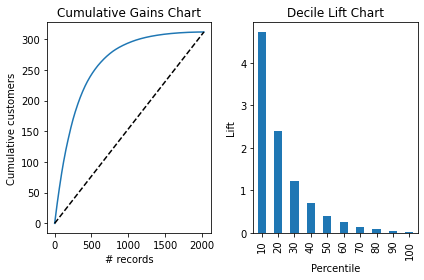

In [70]:
pred_v = pd.Series(logit_result['p(1)'])
pred_v = pred_v.sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative customers')
ax.set_title('Cumulative Gains Chart')

ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

## 경우 나눠서 확인하기(3); SMOTE 사용 오버샘플링

> 가. 변수 전체 사용
> * a. train : valid = 6:4
> * b. train : valid = 7:3
> * c. train : valid = 8:2

> 나. Corr 상위 변수 7개 사용
> * a. train : valid = 6:4
> * b. train : valid = 7:3
> * c. train : valid = 8:2

## 가-a

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
X = dummy_df.drop(columns=['Attrition_Flag'])
y = dummy_df['Attrition_Flag']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [73]:
X_resampled2, y_resampled2 = SMOTE(random_state=1).fit_resample(train_X, train_y)
y_resampled2.value_counts()

0    5098
1    5098
Name: Attrition_Flag, dtype: int64

In [74]:
valid_y.value_counts()

0    3402
1     649
Name: Attrition_Flag, dtype: int64

In [75]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  0.05605911886916622
       Customer_Age    Gender  Dependent_count  Education_Level  \
coeff      0.033604  0.119155         0.237858         0.027078   

       Income_Category  Card_Category  Months_on_book  \
coeff        -0.006363       0.084442       -0.000346   

       Total_Relationship_Count  Months_Inactive_12_mon  \
coeff                 -0.263562                0.344121   

       Contacts_Count_12_mon  ...  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
coeff               0.411324  ...             -0.028214         0.000395   

       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
coeff       -0.097694            -0.126498               0.009509   

       Education_info  Income_info  Marital_Status_Divorced  \
coeff             0.0          0.0                 0.019954   

       Marital_Status_Married  Marital_Status_Single  
coeff               -0.074747               0.102118  

[1 rows x 23 columns]

AIC 2644.2831097886046


In [76]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8884)

       Prediction
Actual    0    1
     0 4952  146
     1  532  446
Confusion Matrix (Accuracy 0.8889)

       Prediction
Actual    0    1
     0 3304   98
     1  352  297


## 가-b

In [77]:
X = dummy_df.drop(columns=['Attrition_Flag'])
y = dummy_df['Attrition_Flag']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)
X_resampled2, y_resampled2 = SMOTE(random_state=1).fit_resample(train_X, train_y)
y_resampled2.value_counts()

0    5949
1    5949
Name: Attrition_Flag, dtype: int64

In [78]:
valid_y.value_counts()

0    2551
1     488
Name: Attrition_Flag, dtype: int64

In [79]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  0.27762202252349527
       Customer_Age    Gender  Dependent_count  Education_Level  \
coeff      0.022955  0.653696         0.250039        -0.013498   

       Income_Category  Card_Category  Months_on_book  \
coeff         0.133691       0.434888        0.001427   

       Total_Relationship_Count  Months_Inactive_12_mon  \
coeff                 -0.355187                0.486103   

       Contacts_Count_12_mon  ...  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
coeff               0.537733  ...             -0.214881         0.000416   

       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
coeff        -0.10586            -0.892758               0.046606   

       Education_info  Income_info  Marital_Status_Divorced  \
coeff             0.0          0.0                  0.12803   

       Marital_Status_Married  Marital_Status_Single  
coeff               -0.359221               0.436355  

[1 rows x 23 columns]

AIC 1852.5671050533238


In [80]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.9004)

       Prediction
Actual    0    1
     0 5774  175
     1  531  608
Confusion Matrix (Accuracy 0.8940)

       Prediction
Actual    0    1
     0 2473   78
     1  244  244


## 가-c

In [81]:
X = dummy_df.drop(columns=['Attrition_Flag'])
y = dummy_df['Attrition_Flag']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)
X_resampled2, y_resampled2 = SMOTE(random_state=1).fit_resample(train_X, train_y)
y_resampled2.value_counts()

0    6805
1    6805
Name: Attrition_Flag, dtype: int64

In [82]:
valid_y.value_counts()

0    1695
1     331
Name: Attrition_Flag, dtype: int64

In [83]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  0.21304458226180284
       Customer_Age    Gender  Dependent_count  Education_Level  \
coeff      0.029694  0.516683         0.163961         0.042766   

       Income_Category  Card_Category  Months_on_book  \
coeff         0.066657       0.309103       -0.015514   

       Total_Relationship_Count  Months_Inactive_12_mon  \
coeff                 -0.317168                0.550048   

       Contacts_Count_12_mon  ...  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
coeff               0.633391  ...             -0.183881         0.000426   

       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
coeff        -0.10652            -0.663424               0.023364   

       Education_info  Income_info  Marital_Status_Divorced  \
coeff             0.0          0.0                 0.072254   

       Marital_Status_Married  Marital_Status_Single  
coeff               -0.301343               0.388062  

[1 rows x 23 columns]

AIC 1245.4096875573232


In [84]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8984)

       Prediction
Actual    0    1
     0 6587  218
     1  605  691
Confusion Matrix (Accuracy 0.8944)

       Prediction
Actual    0    1
     0 1642   53
     1  161  170


## 나-a

In [85]:
X = dummy_df[['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Contacts_Count_12_mon', 'Avg_Utilization_Ratio', 'Total_Trans_Amt','Total_Relationship_Count','Months_Inactive_12_mon']]
y = dummy_df['Attrition_Flag']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [86]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  2.8045265453407064
       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Total_Revolving_Bal  \
coeff       -0.098764             -2.24132             -0.00099   

       Contacts_Count_12_mon  Avg_Utilization_Ratio  Total_Trans_Amt  \
coeff               0.580806               0.306488         0.000418   

       Total_Relationship_Count  Months_Inactive_12_mon  
coeff                 -0.313689                0.583669  

AIC 2382.7343753229707


In [87]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8980)

       Prediction
Actual    0    1
     0 4937  161
     1  459  519
Confusion Matrix (Accuracy 0.8951)

       Prediction
Actual    0    1
     0 3288  114
     1  311  338


## 나-b

In [88]:
X = dummy_df[['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Contacts_Count_12_mon', 'Avg_Utilization_Ratio', 'Total_Trans_Amt','Total_Relationship_Count','Months_Inactive_12_mon']]
y = dummy_df['Attrition_Flag']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [89]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  1.62815680532268
       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Total_Revolving_Bal  \
coeff       -0.091149            -1.493397            -0.000886   

       Contacts_Count_12_mon  Avg_Utilization_Ratio  Total_Trans_Amt  \
coeff               0.656317               0.172431         0.000375   

       Total_Relationship_Count  Months_Inactive_12_mon  
coeff                 -0.322241                0.645757  

AIC 1841.3845026367553


In [90]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8912)

       Prediction
Actual    0    1
     0 5777  172
     1  599  540
Confusion Matrix (Accuracy 0.8934)

       Prediction
Actual    0    1
     0 2475   76
     1  248  240


## 나-c

In [91]:
X = dummy_df[['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Contacts_Count_12_mon', 'Avg_Utilization_Ratio', 'Total_Trans_Amt','Total_Relationship_Count','Months_Inactive_12_mon']]
y = dummy_df['Attrition_Flag']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [92]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  1.016552398774393
       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Total_Revolving_Bal  \
coeff       -0.088396            -1.047796            -0.000857   

       Contacts_Count_12_mon  Avg_Utilization_Ratio  Total_Trans_Amt  \
coeff               0.704332               0.099817         0.000362   

       Total_Relationship_Count  Months_Inactive_12_mon  
coeff                 -0.303801                0.646897  

AIC 1325.9461896487028


In [93]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8899)

       Prediction
Actual    0    1
     0 6614  191
     1  701  595
Confusion Matrix (Accuracy 0.8885)

       Prediction
Actual    0    1
     0 1640   55
     1  171  160


# 경우 나눠서 확인하기(4); 가중치 부여

> 가. 변수 전체 사용
> * a. train : valid = 6:4
> * b. train : valid = 7:3
> * c. train : valid = 8:2

> 나. Corr 상위 변수 7개 사용
> * a. train : valid = 6:4
> * b. train : valid = 7:3
> * c. train : valid = 8:2

## 가-a

In [94]:
X = dummy_df.drop(columns=['Attrition_Flag'])
y = dummy_df['Attrition_Flag']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

weights = {0:1.0, 1:5.0}


In [95]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  0.05605911886916622
       Customer_Age    Gender  Dependent_count  Education_Level  \
coeff      0.033604  0.119155         0.237858         0.027078   

       Income_Category  Card_Category  Months_on_book  \
coeff        -0.006363       0.084442       -0.000346   

       Total_Relationship_Count  Months_Inactive_12_mon  \
coeff                 -0.263562                0.344121   

       Contacts_Count_12_mon  ...  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
coeff               0.411324  ...             -0.028214         0.000395   

       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
coeff       -0.097694            -0.126498               0.009509   

       Education_info  Income_info  Marital_Status_Divorced  \
coeff             0.0          0.0                 0.019954   

       Marital_Status_Married  Marital_Status_Single  
coeff               -0.074747               0.102118  

[1 rows x 23 columns]

AIC 2644.2831097886046


In [96]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8884)

       Prediction
Actual    0    1
     0 4952  146
     1  532  446
Confusion Matrix (Accuracy 0.8889)

       Prediction
Actual    0    1
     0 3304   98
     1  352  297


## 가-b

In [97]:
X = dummy_df.drop(columns=['Attrition_Flag'])
y = dummy_df['Attrition_Flag']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

weights = {0:1.0, 1:5.0}
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))


intercept  0.27762202252349527
       Customer_Age    Gender  Dependent_count  Education_Level  \
coeff      0.022955  0.653696         0.250039        -0.013498   

       Income_Category  Card_Category  Months_on_book  \
coeff         0.133691       0.434888        0.001427   

       Total_Relationship_Count  Months_Inactive_12_mon  \
coeff                 -0.355187                0.486103   

       Contacts_Count_12_mon  ...  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
coeff               0.537733  ...             -0.214881         0.000416   

       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
coeff        -0.10586            -0.892758               0.046606   

       Education_info  Income_info  Marital_Status_Divorced  \
coeff             0.0          0.0                  0.12803   

       Marital_Status_Married  Marital_Status_Single  
coeff               -0.359221               0.436355  

[1 rows x 23 columns]

AIC 1852.5671050533238


In [98]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.9004)

       Prediction
Actual    0    1
     0 5774  175
     1  531  608
Confusion Matrix (Accuracy 0.8940)

       Prediction
Actual    0    1
     0 2473   78
     1  244  244


## 가-c

In [99]:
X = dummy_df.drop(columns=['Attrition_Flag'])
y = dummy_df['Attrition_Flag']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

weights = {0:1.0, 1:5.0}
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))


intercept  0.21304458226180284
       Customer_Age    Gender  Dependent_count  Education_Level  \
coeff      0.029694  0.516683         0.163961         0.042766   

       Income_Category  Card_Category  Months_on_book  \
coeff         0.066657       0.309103       -0.015514   

       Total_Relationship_Count  Months_Inactive_12_mon  \
coeff                 -0.317168                0.550048   

       Contacts_Count_12_mon  ...  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
coeff               0.633391  ...             -0.183881         0.000426   

       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
coeff        -0.10652            -0.663424               0.023364   

       Education_info  Income_info  Marital_Status_Divorced  \
coeff             0.0          0.0                 0.072254   

       Marital_Status_Married  Marital_Status_Single  
coeff               -0.301343               0.388062  

[1 rows x 23 columns]

AIC 1245.4096875573232


In [100]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8984)

       Prediction
Actual    0    1
     0 6587  218
     1  605  691
Confusion Matrix (Accuracy 0.8944)

       Prediction
Actual    0    1
     0 1642   53
     1  161  170


## 나-a

In [101]:
X = dummy_df[['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Contacts_Count_12_mon', 'Avg_Utilization_Ratio', 'Total_Trans_Amt','Total_Relationship_Count','Months_Inactive_12_mon']]
y = dummy_df['Attrition_Flag']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
weights = {0:1.0, 1:5.0}
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  2.8045265453407064
       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Total_Revolving_Bal  \
coeff       -0.098764             -2.24132             -0.00099   

       Contacts_Count_12_mon  Avg_Utilization_Ratio  Total_Trans_Amt  \
coeff               0.580806               0.306488         0.000418   

       Total_Relationship_Count  Months_Inactive_12_mon  
coeff                 -0.313689                0.583669  

AIC 2382.7343753229707


In [102]:
weights = {0:1.0, 1:5.0}
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  2.8045265453407064
       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Total_Revolving_Bal  \
coeff       -0.098764             -2.24132             -0.00099   

       Contacts_Count_12_mon  Avg_Utilization_Ratio  Total_Trans_Amt  \
coeff               0.580806               0.306488         0.000418   

       Total_Relationship_Count  Months_Inactive_12_mon  
coeff                 -0.313689                0.583669  

AIC 2382.7343753229707


## 나-b

In [103]:
X = dummy_df[['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Contacts_Count_12_mon', 'Avg_Utilization_Ratio', 'Total_Trans_Amt','Total_Relationship_Count','Months_Inactive_12_mon']]
y = dummy_df['Attrition_Flag']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)
weights = {0:1.0, 1:5.0}
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  1.62815680532268
       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Total_Revolving_Bal  \
coeff       -0.091149            -1.493397            -0.000886   

       Contacts_Count_12_mon  Avg_Utilization_Ratio  Total_Trans_Amt  \
coeff               0.656317               0.172431         0.000375   

       Total_Relationship_Count  Months_Inactive_12_mon  
coeff                 -0.322241                0.645757  

AIC 1841.3845026367553


In [104]:
weights = {0:1.0, 1:5.0}
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  1.62815680532268
       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Total_Revolving_Bal  \
coeff       -0.091149            -1.493397            -0.000886   

       Contacts_Count_12_mon  Avg_Utilization_Ratio  Total_Trans_Amt  \
coeff               0.656317               0.172431         0.000375   

       Total_Relationship_Count  Months_Inactive_12_mon  
coeff                 -0.322241                0.645757  

AIC 1841.3845026367553


## 나-c

In [105]:
X = dummy_df[['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Contacts_Count_12_mon', 'Avg_Utilization_Ratio', 'Total_Trans_Amt','Total_Relationship_Count','Months_Inactive_12_mon']]
y = dummy_df['Attrition_Flag']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)
weights = {0:1.0, 1:5.0}
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  1.016552398774393
       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Total_Revolving_Bal  \
coeff       -0.088396            -1.047796            -0.000857   

       Contacts_Count_12_mon  Avg_Utilization_Ratio  Total_Trans_Amt  \
coeff               0.704332               0.099817         0.000362   

       Total_Relationship_Count  Months_Inactive_12_mon  
coeff                 -0.303801                0.646897  

AIC 1325.9461896487028


In [106]:
weights = {0:1.0, 1:5.0}
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  1.016552398774393
       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Total_Revolving_Bal  \
coeff       -0.088396            -1.047796            -0.000857   

       Contacts_Count_12_mon  Avg_Utilization_Ratio  Total_Trans_Amt  \
coeff               0.704332               0.099817         0.000362   

       Total_Relationship_Count  Months_Inactive_12_mon  
coeff                 -0.303801                0.646897  

AIC 1325.9461896487028
